This practice comes from [#WOW2023 week 16: Can you build insightful advanced tables?](https://workout-wednesday.com/2023w16tab/).

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plottable import Table, ColDef

In [4]:
file_path = './datasets/Superstore.xlsx'
data = pd.read_excel(file_path, index_col=0)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [29]:
data['year'] = data['Order Date'].dt.year

In [32]:
data_grouped = data.groupby(by=['Sub-Category', 'year']).sum(numeric_only=True)
data_grouped

Postal Code       Sales  Quantity  Discount      Profit
Sub-Category year                                                         
Accessories  2018    8903209.0  25014.2720       580     11.60   6402.7150
             2019    9096573.0  40523.9600       635     14.60  10197.2752
             2020   10701130.0  41895.8540       682     14.80   9664.2885
             2021   15756706.0  59946.2320      1079     19.80  15672.3570
Appliances   2018    4859680.0  15313.6250       314     15.30   2459.4999
...                        ...         ...       ...       ...         ...
Supplies     2021    3169876.0  16049.4100       192      4.20   -955.3128
Tables       2018    4053783.0  46088.3655       270     18.95  -3124.0427
             2019    3419752.0  39150.4235       235     13.75  -3509.8019
             2020    4793691.0  60833.2005       346     23.05  -2950.9418
             2021    6340602.0  60893.5425       390     27.60  -8140.6947

[68 rows x 5 columns]

In [68]:
data_2021 = data_grouped.loc[(slice(None),2021),:].reset_index(level=1)
data_2020 = data_grouped.loc[(slice(None),2020),:].reset_index(level=1)
data_2021['YoY Sales'] = data_2021['Sales'] / data_2020['Sales'] - 1
data_2021['Change in Profit'] = data_2021['Profit'] - data_2020['Profit']
data_2021['Profit Ratio'] = data_2021['Profit'] / data_2021['Sales']
data_2021 = data_2021.sort_values(by='Profit', ascending=False)
data_2021['Profit Rank'] = np.arange(1, len(data_2021)+1)
data_2021 = data_2021.sort_values(by='Sales', ascending=False)
data_2021['Sales Rank'] = np.arange(1, len(data_2021)+1)
data_table = data_2021.loc[:,['Sales Rank', 'Sales', 'YoY Sales', 'Profit Rank', 'Profit', 'Change in Profit', 'Profit Ratio']]
data_table.rename(columns={'Sales': 'Current Sales', 'Profit': 'Current Profit'}, inplace=True)
data_table

,Sales Rank,Current Sales,YoY Sales,Profit Rank,Current Profit,Change in Profit,Profit Ratio
Sub-Category,,,,,,,
Phones,1,105340.5160,0.334065,3,12849.3250,3389.7321,0.121979
Chairs,2,95554.3530,0.138655,7,7643.5493,1880.3954,0.079992
Binders,3,72788.0450,0.465040,6,7669.7418,-2545.8923,0.105371
Storage,4,69677.6180,0.185221,8,7402.8007,1198.5139,0.106244
Copiers,5,62899.3880,0.268148,1,25031.7902,7288.9976,0.397966
Tables,6,60893.5425,0.000992,17,-8140.6947,-5189.7529,-0.133687
Accessories,7,59946.2320,0.430839,2,15672.3570,6008.0685,0.261440
Machines,8,43544.6750,-0.221121,16,-2869.2156,-5776.5336,-0.065891
Appliances,9,42926.9320,0.647847,5,7865.2683,2563.9268,0.183225


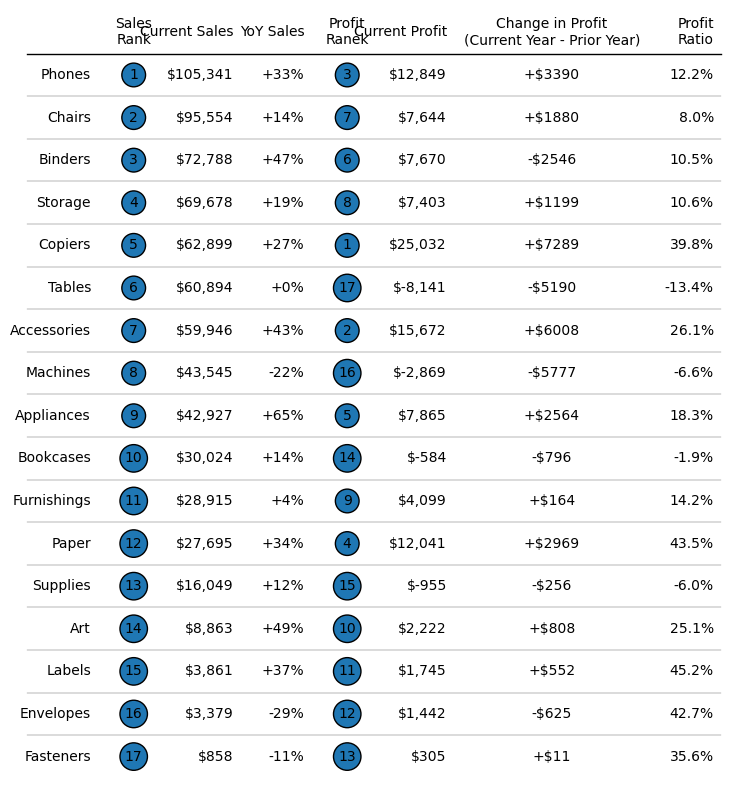

In [89]:
px = 1 / plt.rcParams['figure.dpi']

fig, ax = plt.subplots(figsize=(900*px, 1000*px))
tab = Table(data_table, column_definitions=[
    ColDef(name='Sub-Category', title=''),
    ColDef(name='Sales Rank', title='Sales\nRank',
           textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
          ),
    ColDef(name='Current Sales', formatter='${:,.0f}'),
    ColDef(name='YoY Sales', formatter='{:+.0%}'),
    ColDef(name='Profit Rank', title='Profit\nRanek',
           textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
          ),
    ColDef(name='Change in Profit', title='Change in Profit\n(Current Year - Prior Year)', 
           formatter=lambda x: f'+${x:.0f}' if x >=0 else f'-${-x:.0f}',
           width=2.75,
           textprops={
               'ha': 'center'
           },
          ),
    ColDef(name='Current Profit', formatter='${:,.0f}'),
    ColDef(name='Profit Ratio', title='Profit\nRatio', formatter='{:.1%}'),
])
plt.show()

In [80]:
data_grouped.loc['Fasteners', :]

,Postal Code,Sales,Quantity,Discount,Profit
year,,,,,
2018,3220718.0,661.328,201,5.2,178.5583
2019,2402920.0,545.224,176,3.8,171.9376
2020,3070936.0,960.134,288,4.6,294.0734
2021,3811489.0,857.594,249,4.2,304.9489
